In [155]:
# COMP 4630 - Assignment 1
# Group: Alex Pham, Matt Manolov, Zakie Shah
# Due date: Jan 31, 2025 @ 5pm
# * We tried doing the Git pull requests but it got a bit messy so we decided to call in Discord
# and worked together in person on the code and reflection questions. We added some comments of what 
# we discussed and what we should change etc. *

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [157]:
# loading the housing csv
df = pd.read_csv("data/yyc_housing_2024.csv")

# info about the csv
df.info()

# First few rows of the data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ADDRESS               373225 non-null  object 
 1   ASSESSED_VALUE        373225 non-null  float64
 2   COMM_CODE             373225 non-null  object 
 3   YEAR_OF_CONSTRUCTION  372935 non-null  float64
 4   LAND_USE_DESIGNATION  370707 non-null  object 
 5   LAND_SIZE_SM          373225 non-null  float64
 6   SUB_PROPERTY_USE      373225 non-null  object 
 7   LATITUDE              373225 non-null  float64
 8   LONGITUDE             373225 non-null  float64
dtypes: float64(5), object(4)
memory usage: 25.6+ MB


,ADDRESS,ASSESSED_VALUE,COMM_CODE,YEAR_OF_CONSTRUCTION,LAND_USE_DESIGNATION,LAND_SIZE_SM,SUB_PROPERTY_USE,LATITUDE,LONGITUDE
0,311 3 SOMERVALE VW SW,185500.0,SOM,1999.0,M-C1,12990.0,RE0201,50.897013,-114.070656
1,219 VALLEY POINTE PL NW,792500.0,VAL,2012.0,R-1,458.3,RE0110,51.089562,-114.270342
2,6555 MARTINGROVE DR NE,394500.0,MRT,1983.0,R-C2,291.6,RE0110,51.112120,-113.952455
3,75 CRANBROOK GR SE,815500.0,CRA,2018.0,R-G,320.9,RE0110,50.862672,-113.976197
4,3872 FONDA WY SE,324000.0,FHT,1977.0,R-C2,314.1,RE0120,51.047305,-113.978818


In [158]:
# mapping dictionary that translate SUB_PROPERTY_USE codes to human readable names
# uses SUB_PROPERTY_USE_DESC for actual names and SUB_PROPERTY_USE for code name
property_code_mapping = {
    "RE0100": "Residential Acreage",
    "RE0110": "Detached",
    "RE0111": "Detached with Backyard Suite",
    "RE0120": "Duplex",
    "RE0121": "Duplex Building",
    "RE0201": "Low Rise Apartment Condo",
    "RE0210": "Low Rise Rental Condo",
    "RE0301": "High Rise Apartment Condo",
    "RE0310": "High Rise Rental Condo",
    "RE0401": "Townhouse",
    "RE0410": "Townhouse Complex",
    "RE0601": "Collective Residence",
    "RE0800": "Manufactured Home"
}
df['SUB_PROPERTY_USE_DESC'] = df['SUB_PROPERTY_USE'].map(property_code_mapping)

# Zakie suggested that we add a dictionary so it is easier to read for the property use code

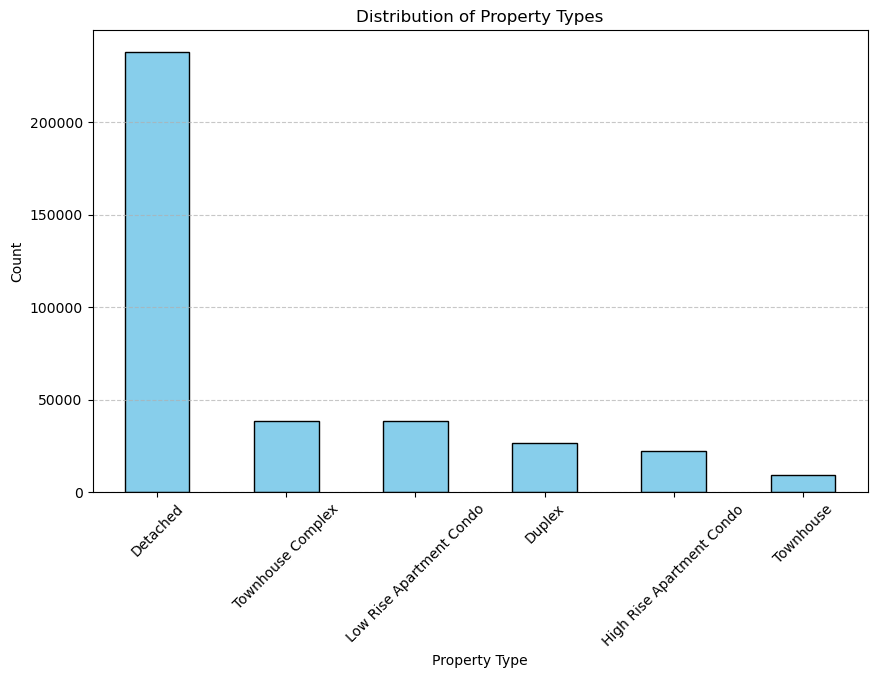

In [159]:
# property type distribution 
df['SUB_PROPERTY_USE_DESC'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Alex and Matt suggested we make a distribution of property types 
# In the distribution of property types we see that a large amount of the buildings are detached homes as compared to others 
# in the dataset. This could cause overfitting. (Matt)

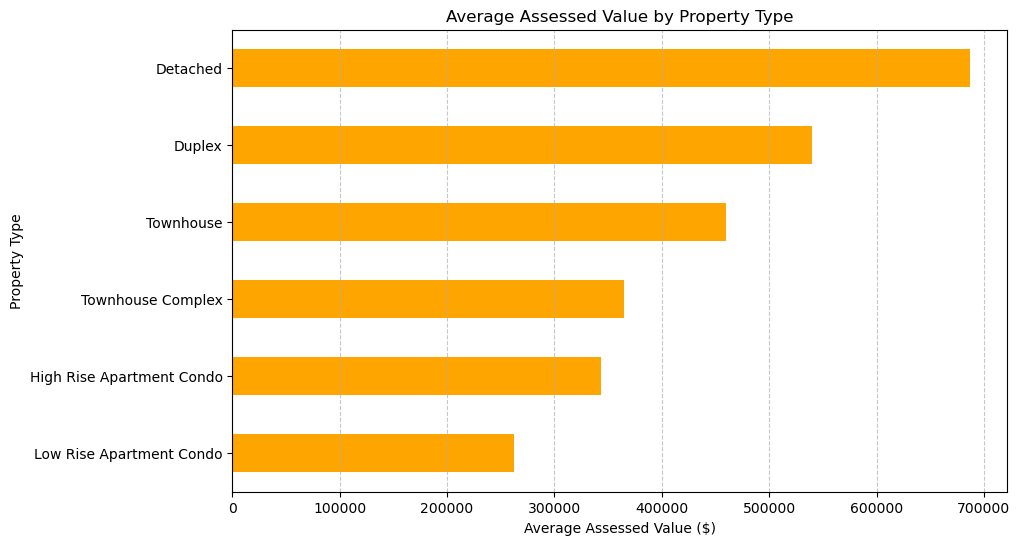

In [160]:
# average assessed value by property type
# We see the how each of the properties average assessed value reflects our expectations on how the market would rank these property types. 
# Detached homes are the highest where a low rise apartemnt condo is the lowest. This tells us that the average assessed value in the dataset 
# is relatively accurate. (Matt)

df.groupby('SUB_PROPERTY_USE_DESC')['ASSESSED_VALUE'].mean().sort_values().plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Average Assessed Value by Property Type')
plt.xlabel('Average Assessed Value ($)')
plt.ylabel('Property Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

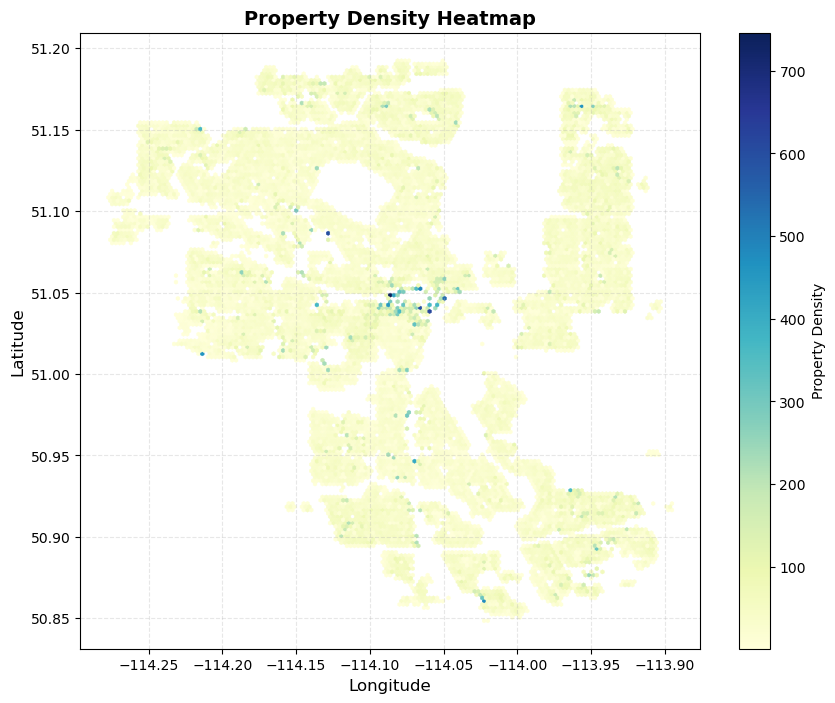

In [161]:
# heatmap of property locations in Calgary
# we can see that the majority of the highest valued properties are located in the centre of the city 
# however there are many examples of outlieres that are high valued properties located further out but not 
# as dense as downtown. 


plt.figure(figsize=(10, 8))

plt.hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=150, cmap='YlGnBu', mincnt=1, alpha=0.99, linewidths=0.3) #changing the colour map and transparency
cbar = plt.colorbar(label='Property Density')
cbar.ax.tick_params(labelsize=10)

plt.title('Property Density Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


## Outline of the city of Calgary - Largest property density is shown to be in the middle, where the city of Calgary is located, which is the most populated city in Alberta

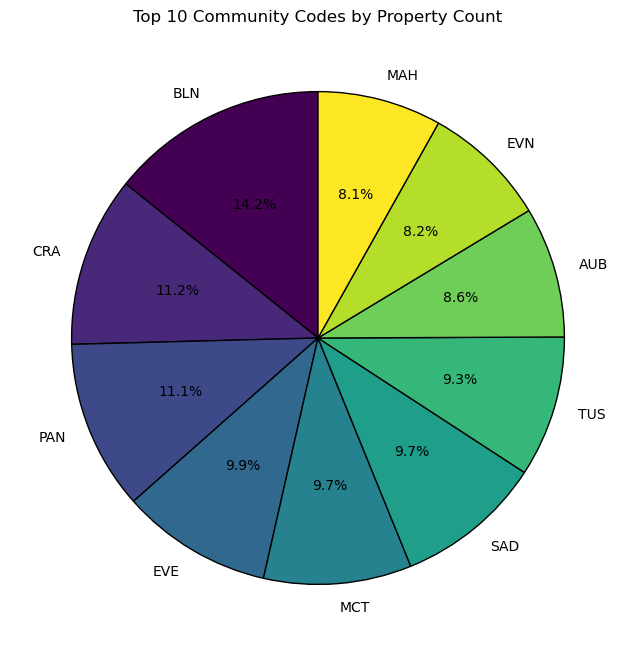

In [162]:
# property counts by community code 
# Zakie also said this could be helpful for stratified sampling
df['COMM_CODE'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='viridis', wedgeprops={'edgecolor': 'black'})
plt.title('Top 10 Community Codes by Property Count')
plt.ylabel('') 
plt.show()

# Alex suggested to see which communities have the highest count of properties

array([[<Axes: title={'center': 'ASSESSED_VALUE'}>,
        <Axes: title={'center': 'YEAR_OF_CONSTRUCTION'}>],
       [<Axes: title={'center': 'LAND_SIZE_SM'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>, <Axes: >]], dtype=object)

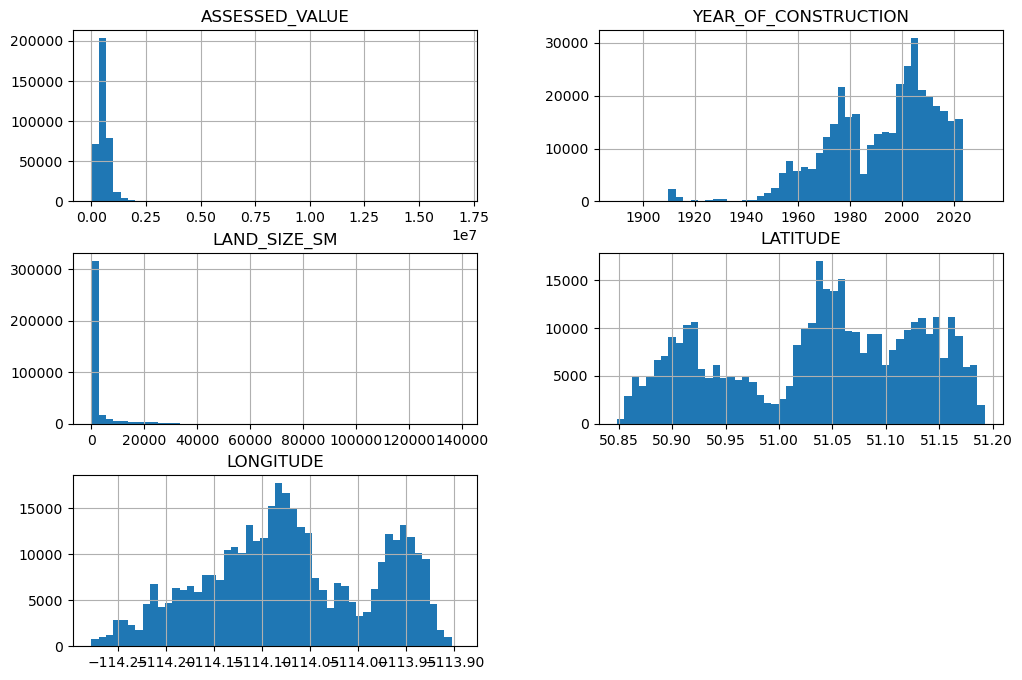

In [163]:
# plot histogram
# 1. Assessed_Value - most of the evaluations are done on the lower valued side (Zakie)
# 2. Year_Of_Construction - follows the trend of building in Calgary over the years. We expected to see increase in buildings with increase in population. (Matt)
# 3. Land Size - most properties have relatively small sizes (Alex)
# 4. Latitude and Longitude - locations in Calgary can reflect value of property. We can see a clear spike towards the centre of the city in both Lat and Long Graphs. (Matt)
 

df.hist(bins=50, figsize=(12, 8))

In [164]:
# spilt our data into testing and training data
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f"\nTraining samples: {len(train_set)}, Testing samples: {len(test_set)}")

# we save our training and set set to seperate csv
train_set.to_csv("train_set.csv", index=False)
test_set.to_csv("test_set.csv", index=False)
print("\nTrain and test sets saved as 'train_set.csv' and 'test_set.csv'")

# this sets df to be the training 80% of the original data
df = pd.read_csv("train_set.csv")



Training samples: 298580, Testing samples: 74645

Train and test sets saved as 'train_set.csv' and 'test_set.csv'


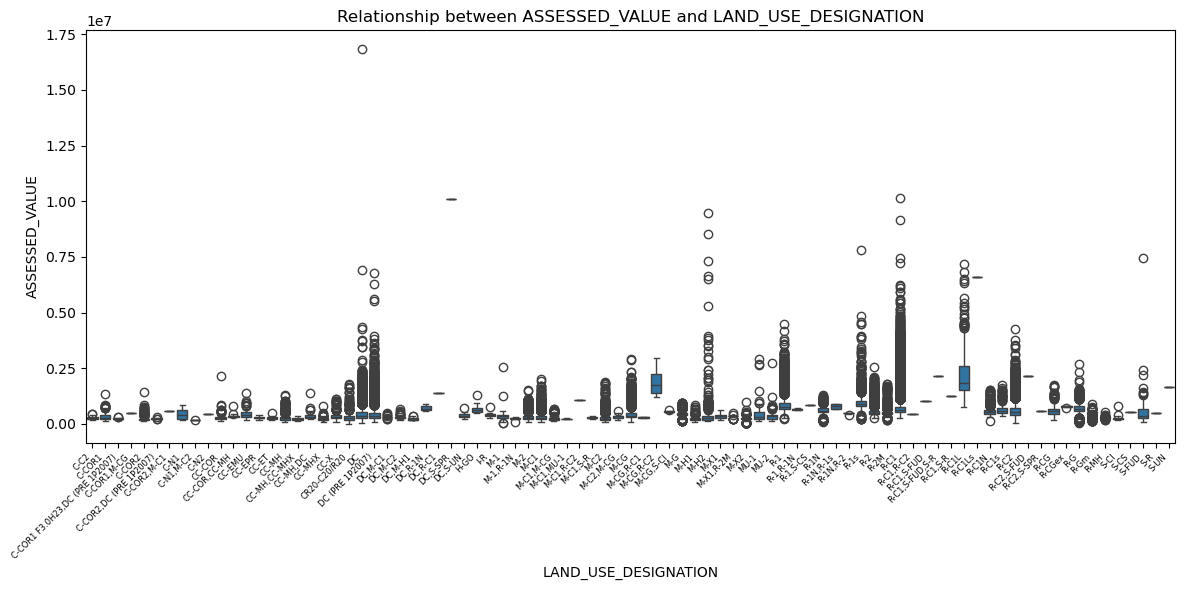

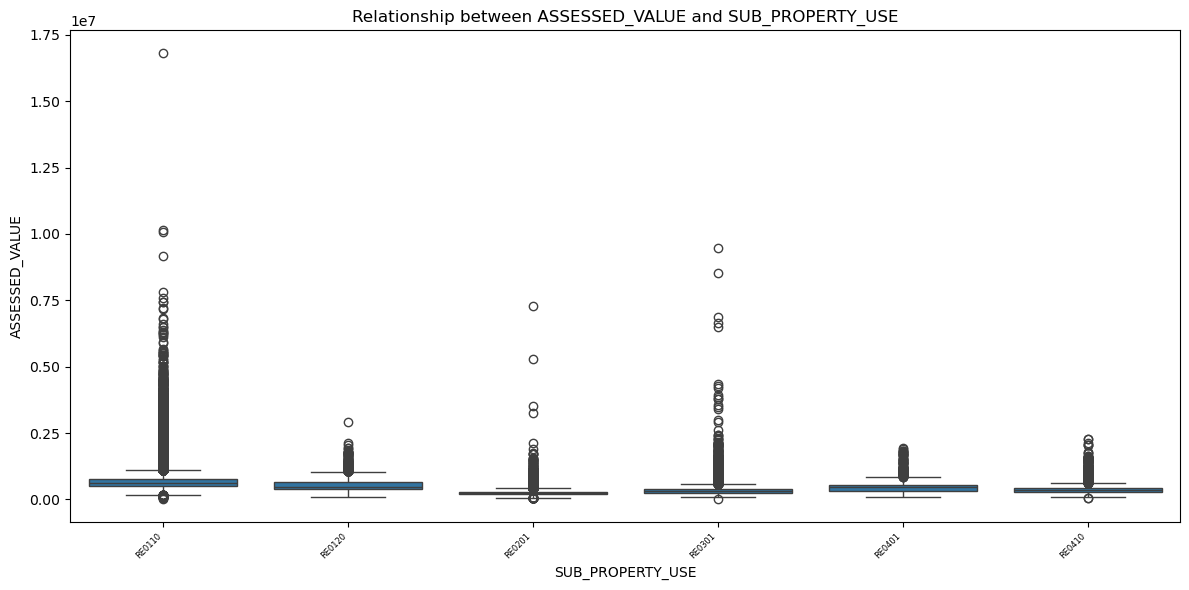

In [165]:
import seaborn as sns

# treat columns as categorical
df['COMM_CODE'] = df['COMM_CODE'].astype('category')
df['LAND_USE_DESIGNATION'] = df['LAND_USE_DESIGNATION'].astype('category')
df['SUB_PROPERTY_USE'] = df['SUB_PROPERTY_USE'].astype('category')

# plot value relationships
def plot_relationships(data, category, target):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category, y=target, data=data)
    plt.xticks(rotation=45, ha='right', fontsize=6)  # Adjust rotation, alignment, and font size
    plt.title(f"Relationship between {target} and {category}", fontsize=12)
    plt.xlabel(category, fontsize=10)
    plt.ylabel(target, fontsize=10)
    plt.tight_layout()
    plt.show()

# plot for COMM_CODE vs ASSESSED_VALUE
# way too many COMM_CODES to visualise properly, maybe we can fix, commented out for now which can be shown if needed
# plot_relationships(df, 'COMM_CODE', 'ASSESSED_VALUE')

# Plot for LAND_USE_DESIGNATION vs ASSESSED_VALUE
# we see highest valued land_use_designations is: 
# 1. Residential - Contextual One Dwelling District (R-C1)
# 2. Multi-Residential - High Density Medium Rise District (M-H2)
# 3. Direct Control District, (DC)

plot_relationships(df, 'LAND_USE_DESIGNATION', 'ASSESSED_VALUE')

# Plot for SUB_PROPERTY_USE vs ASSESSED_VALUE
# We see that the some of the highest values are
# 1. RE0110 Detached
# 2. RE0301 High Rise Apartment Condo
# 3. RE0201 Low Rise Apartment Condo

plot_relationships(df, 'SUB_PROPERTY_USE', 'ASSESSED_VALUE')


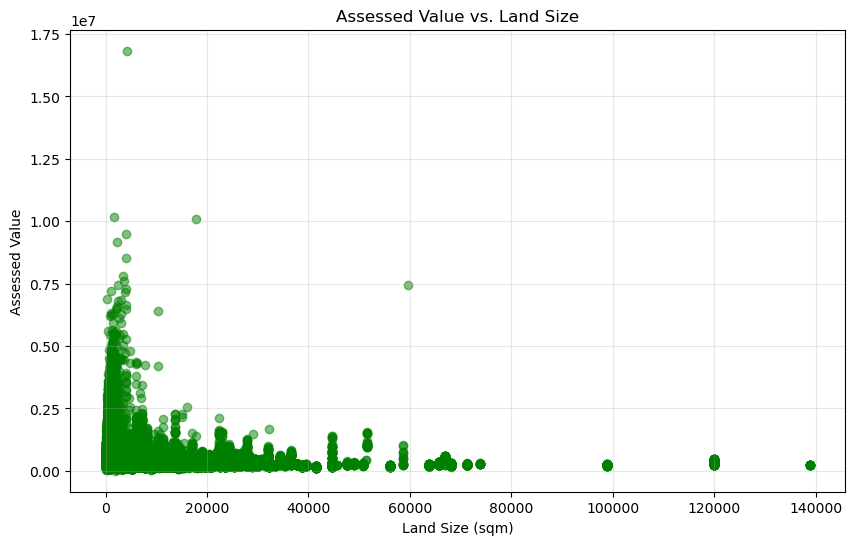

In [166]:
# scatter plot for LAND_SIZE_SM vs. ASSESSED_VALUE
# We see that there are some outliers, and that most of the evaluated properties are of small land size. 

plt.figure(figsize=(10, 6))
plt.scatter(df['LAND_SIZE_SM'], df['ASSESSED_VALUE'], alpha=0.5, color='green')
plt.title('Assessed Value vs. Land Size')
plt.xlabel('Land Size (sqm)')
plt.ylabel('Assessed Value')
plt.grid(alpha=0.3)
plt.show()


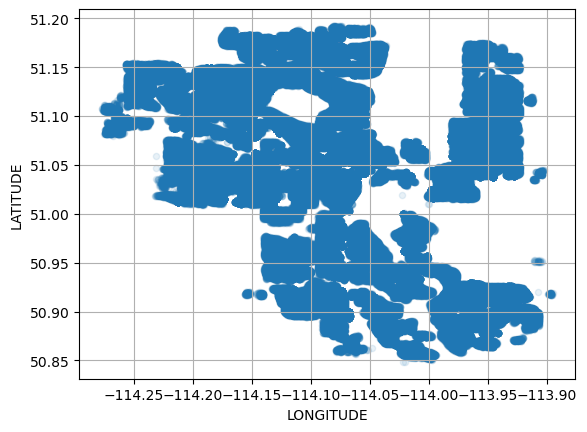

In [167]:
# geographical data
# the data helps get an idea how orperties in the dataset and how it is distributed around the city
# we see that it is mostly residential data and not downtown or industrial 

df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", grid=True, alpha=0.1)
plt.show()

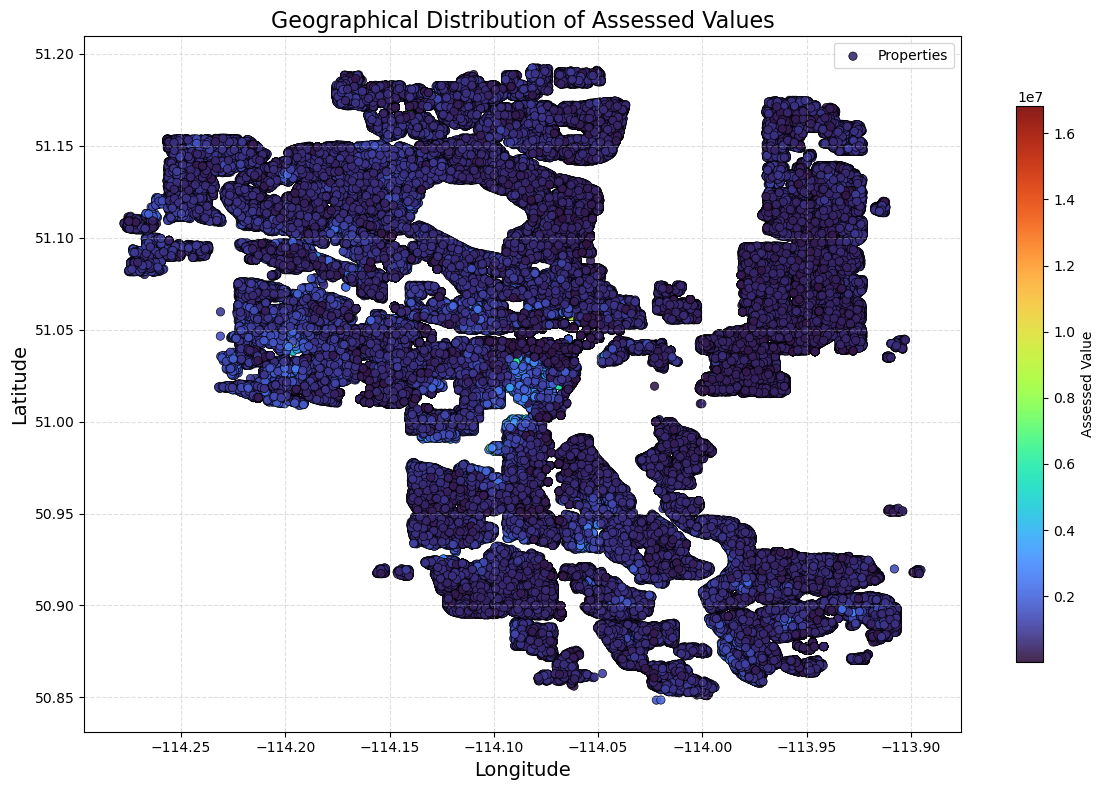

In [168]:
# geographical distribution of assesed values
plt.figure(figsize=(12, 8)) 
sc = plt.scatter(
    x=df['LONGITUDE'], 
    y=df['LATITUDE'], 
    c=df['ASSESSED_VALUE'], 
    cmap='turbo',
    alpha=0.9, 
    edgecolor='k',
    linewidth=0.5,
    label='Properties'
)
plt.colorbar(sc, label='Assessed Value', shrink=0.8)
plt.title('Geographical Distribution of Assessed Values', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(alpha=0.4, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# we all said we should see how assesed values vary across the city


In [169]:
# preprocessing - handle missing values, outliers, categorical data, split time/date, etc

# checking nulls 
print(df.isnull().sum())


ADDRESS                     0
ASSESSED_VALUE              0
COMM_CODE                   0
YEAR_OF_CONSTRUCTION      230
LAND_USE_DESIGNATION     2020
LAND_SIZE_SM                0
SUB_PROPERTY_USE            0
LATITUDE                    0
LONGITUDE                   0
SUB_PROPERTY_USE_DESC       0
dtype: int64


In [170]:
# correlation of the data

corr_matrix = df.corr(numeric_only=True)
corr_matrix["ASSESSED_VALUE"].sort_values(ascending=False)

#zakie said we should see the correlation

ASSESSED_VALUE          1.000000
YEAR_OF_CONSTRUCTION    0.055332
LATITUDE               -0.003268
LONGITUDE              -0.198412
LAND_SIZE_SM           -0.233028
Name: ASSESSED_VALUE, dtype: float64

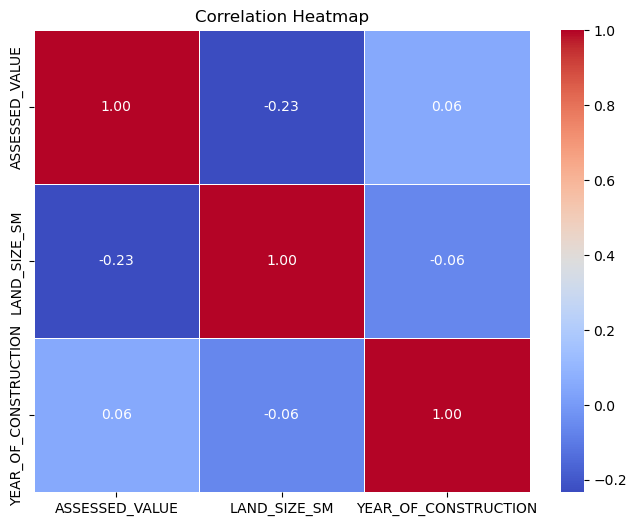

In [171]:
# correlation heatmap
corr = df[['ASSESSED_VALUE', 'LAND_SIZE_SM', 'YEAR_OF_CONSTRUCTION']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### ASSESSED_VALUE vs. LAND_SIZE_SM (-0.23)
### A weak negative correlation, this suggests that in Calgary, larger properties might not always have higher values, possibly due to zoning, location, or usage types.

### LAND_SIZE_SM vs. YEAR_OF_CONSTRUCTION (-0.06)
A very weak negative correlation, suggesting that newer properties might have slightly smaller land sizes on average.
This aligns with trends where modern properties are built on smaller lots compared to older properties.

In [172]:
# Drop 'ASSESSED_VALUE' from strat_train_set and create 'housing'
#housing = train_set.drop("ASSESSED_VALUE", axis=1)

# Separate the 'ASSESSED_VALUE' column into a new DataFrame (if needed as labels)
#housing_labels = train_set["ASSESSED_VALUE"].copy()

In [ ]:
# Making the pipeline and our model: 
# We chose to train for Assessed_Value as we saw that would be most fitting case to predict to

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import joblib

train_set = pd.read_csv("train_set.csv")

# numerical and categorical attributes
num_attribs = ["YEAR_OF_CONSTRUCTION", "LAND_SIZE_SM", "LATITUDE", "LONGITUDE"]
cat_attribs = ["COMM_CODE", "LAND_USE_DESIGNATION", "SUB_PROPERTY_USE"]

# separating features and target column
X_train = train_set[num_attribs + cat_attribs] 
y_train = train_set["ASSESSED_VALUE"]          

# creating the pipeline for the numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))   # , 
 #  ("scaler", StandardScaler()),                   Not Needed for best, leave for now
])

# pipelines for categorical attributes
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

# creating a single column transformer
preprocessing_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# preprocessing pipline and model
# we tried three different types of models

full_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("model", RandomForestRegressor())    # Best 
   #("model", DecisionTreeRegressor())    # Better 
   #("model", LinearRegression())         # Don`t use, really bad 
])


In [ ]:
# train the pipeline using the training set
full_pipeline.fit(X_train, y_train)


In [ ]:
# save the pipeline as a pickle(pkl) , just make sure to use enough vinegar.

joblib.dump(full_pipeline, "housing_pipeline.pkl",compress=1)
print("Model trained and pipeline saved!")

Model trained and pipeline saved!
